          State Name Constituency Type  No Of Seats  Electors - Male  \
0     Andhra Pradesh               GEN           20         16430935   
1     Andhra Pradesh                SC            4          3152828   
2     Andhra Pradesh                ST            1           756088   
3     Andhra Pradesh             Total           25         20339851   
4  Arunachal Pradesh               GEN            2           444078   

   Electors - Female  Electors - Third Gender  Electors - Total  \
0           16993558                     2924          33427417   
1            3264103                      386           6417317   
2             800954                      111           1557153   
3           21058615                     3421          41401887   
4             454359                        5            898442   

   Electors - NRIs  Electors - Service  Voters - Male  ...  \
0             6778               56146       13231440  ...   
1             1126                9519  

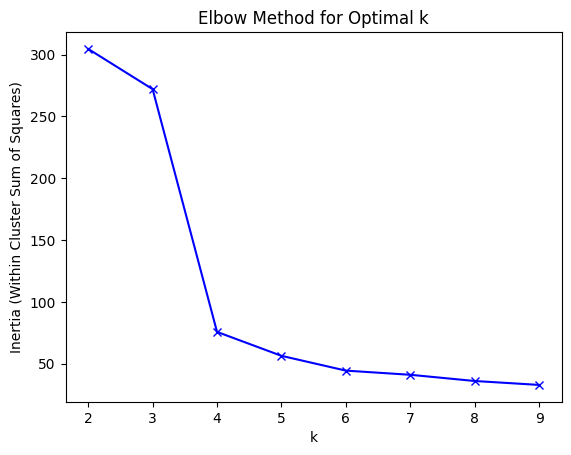

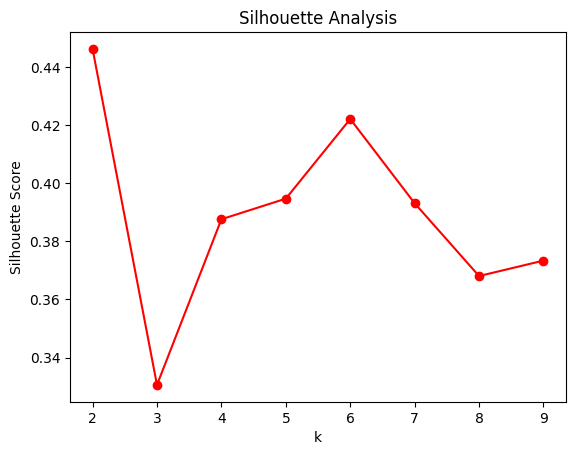

         Voters - Poll %  Gender_Ratio     NOTA Votes  Valid Votes Polled
Cluster                                                                  
0              77.739574      1.035916   84803.893617        8.163334e+06
1              64.317857      1.005093  138680.642857        1.206208e+07
2              62.544118      0.875680  330784.588235        3.516344e+07


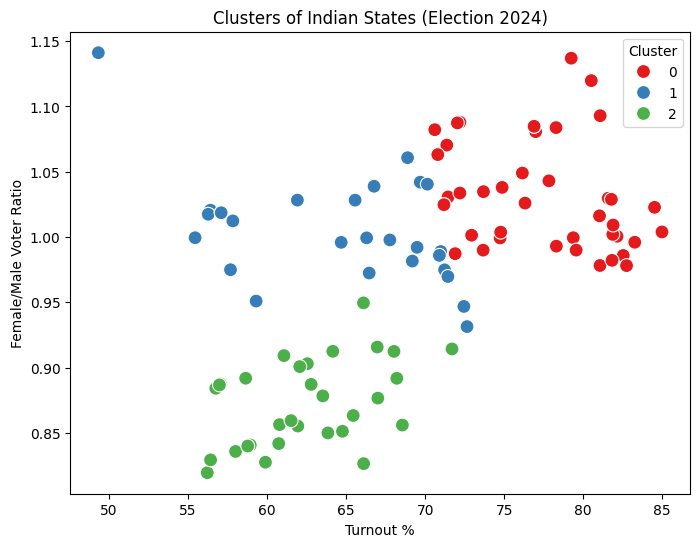

In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 2: Load dataset (replace with your file path)
df = pd.read_csv("Election_2024_Voters_Data.csv")

# Step 3: Inspect data
print(df.head())
print(df.columns)

# Step 4: Feature Engineering
# Create Gender Ratio = Female / Male
df["Gender_Ratio"] = df["Voters - Female"] / (df["Voters - Male"] + 1)

# Select important numeric features
features = df[[
    "Voters - Poll %",
    "Gender_Ratio",
    "NOTA Votes",
    "Valid Votes Polled"
]]

# Fill missing values if any
features = features.fillna(0)

# Step 5: Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 6: Find optimal K (Elbow + Silhouette)
inertia = []
silhouette_scores = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

# Plot Elbow
plt.plot(K, inertia, 'bx-')
plt.xlabel("k")
plt.ylabel("Inertia (Within Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.show()

# Plot Silhouette
plt.plot(K, silhouette_scores, 'ro-')
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()

# Step 7: Train final model (say k=3 based on plots)
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(scaled_features)

# Step 8: Analyze clusters
cluster_summary = df.groupby("Cluster")[[
    "Voters - Poll %",
    "Gender_Ratio",
    "NOTA Votes",
    "Valid Votes Polled"
]].mean()

print(cluster_summary)

# Step 9: Visualize Clusters (using Turnout % vs Gender Ratio)
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df["Voters - Poll %"], 
    y=df["Gender_Ratio"], 
    hue=df["Cluster"], 
    palette="Set1", 
    s=100
)
plt.xlabel("Turnout %")
plt.ylabel("Female/Male Voter Ratio")
plt.title("Clusters of Indian States (Election 2024)")
plt.show()
